In [35]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
userdatapath= '/home/titli/Documents/Springboard1/test.csv'
numsamples=1000

In [4]:
df=pd.read_csv(userdatapath, header=0,  index_col=0, nrows=numsamples)
df.head()

,average_stars,compliment_cool,compliment_cute,compliment_funny,compliment_hot,compliment_list,compliment_more,compliment_note,compliment_photos,compliment_plain,...,cool,elite,fans,friends,funny,name,review_count,useful,user_id,yelping_since
0,4.67,0,0,0,0,0,0,0,0,1,...,0,[],0,"['cvVMmlU1ouS3I5fhutaryQ', 'nj6UZ8tdGo8YJ9lUMT...",0,Johnny,8,0,oMy_rEb0UBEmMlu-zcxnoQ,2014-11-03
1,3.70,0,0,0,0,0,0,0,0,0,...,0,[],0,"['0njfJmB-7n84DlIgUByCNw', 'rFn3Xe3RqHxRSxWOU1...",0,Chris,10,0,JJ-aSuM4pCFPdkfoZ34q0Q,2013-09-24
2,2.00,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Tiffy,1,0,uUzsFQn_6cXDh6rPNGbIFA,2017-03-02
3,4.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Mark,6,0,mBneaEEH5EMyxaVyqS-72A,2015-03-13
4,4.67,0,0,0,0,0,0,0,0,0,...,0,[],0,[],0,Evelyn,3,0,W5mJGs-dcDWRGEhAzUYtoA,2016-09-08


In [5]:
cols='average_stars 	compliment_cool 	compliment_funny 	review_count  fans'.split()
#cols='average_stars'
X=df[cols]
X.head()

,average_stars,compliment_cool,compliment_funny,review_count,fans
0,4.67,0,0,8,0
1,3.70,0,0,10,0
2,2.00,0,0,1,0
3,4.67,0,0,6,0
4,4.67,0,0,3,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1566946e10>,
      dtype=object)

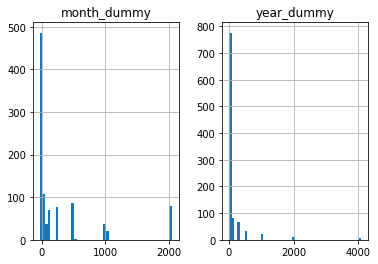

In [6]:
def getnumericyear(A):
    years= ['2004','2005','2006', '2007', '2008' ,'2009', '2010', '2011', '2012', '2013', '2014', '2015', 
        '2016', '2017', '2018']
    for i, x in enumerate(years):
        if (A in x)==True:
            return i+1
def getnumericmonth(B):
    months=['01','02', '03', '04', '05', '06', '07','08', '09', '10', '11','12']
    for i, x in enumerate(months):
        if (B in x)==True:
            return i+1
def getrange(B):
    if B <= -300: return -3
    if B <= -200 and B > -300: return -2
    if B <= -100 and B > -200: return -1
    if B <= 0 and B > -100: return 0
    if B <= 100 and B > 0: return 1
    if B <= 200 and B > 100: return 2
    if B <= 300 and B > 200: return 3
    
Xyear=df['yelping_since']   
df1 = []
for k in range(0,numsamples):
    dyear=(Xyear.iloc[k]).split("-")
    rr1= np.int_(np.concatenate([np.zeros(getnumericmonth(dyear[1])-1),[1],np.zeros(12-getnumericmonth(dyear[1]))]).tolist()) 
    month_d= (int('1'+''.join(map(str, rr1)),2))+ int(dyear[2])-4127 # subtract mode
    rr2= np.int_(np.concatenate([np.zeros(getnumericyear(dyear[0])-1),[1],np.zeros(15-getnumericyear(dyear[0]))]).tolist()) 
    year_d=(int('1'+''.join(map(str, rr2)),2))-32770
    df1.append({'year_dummy': year_d, 'month_dummy': month_d })
            
    
df_yelp=pd.DataFrame(df1)
#sns.heatmap(df_yelp, annot=True)
df_yelp.hist(bins=50)

In [8]:
df['friends'].replace(to_replace= '[]', value=np.nan, inplace=True)
df['friends'].fillna(value='00', inplace=True) 

In [9]:
df2 = []
for k in range(0,numsamples):
    count=0
    Xfrnd=(df['friends'].iloc[[k]].values).tolist()
    dfrnd = (", ".join(Xfrnd)).split(',')[1:-1]
    if dfrnd is None:
       break
    else:
       count=len(dfrnd)
       df2.append({'friend_count': count})    
df_frnd=pd.DataFrame(df2)
df_frnd.head()

,friend_count
0,9
1,77
2,0
3,0
4,0


In [10]:
df3 = []
for k in range(0,numsamples):
    count=0
    Xelite=(df['elite'].iloc[[k]].values).tolist()
    delite = (", ".join(Xelite)).split(',')[1:-1]
    if delite is None:
       break
    else:
       count=len(delite)
       df3.append({'elite_count': count})    
df_elite=pd.DataFrame(df3)
df_elite.head()

,elite_count
0,0
1,0
2,0
3,0
4,0


In [69]:
# Faker dataframe
d={'Faker':[1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0]}
df_faker= pd.DataFrame(data=d)

In [70]:
X1 = pd.concat([X, df_yelp, df_frnd, df_elite,df_faker], axis=1)
X1.head()

,average_stars,compliment_cool,compliment_funny,review_count,fans,month_dummy,month_dummy,year_dummy,year_dummy,friend_count,friend_count,elite_count,elite_count,month_dummy,year_dummy,friend_count,elite_count,Faker
0,4.67,0.0,0.0,8.0,0.0,-26.0,-26.0,14.0,14.0,9.0,9.0,0.0,0.0,-26,14,9,0,1.0
1,3.70,0.0,0.0,10.0,0.0,1.0,1.0,30.0,30.0,77.0,77.0,0.0,0.0,1,30,77,0,0.0
2,2.00,0.0,0.0,1.0,0.0,483.0,483.0,0.0,0.0,0.0,0.0,0.0,0.0,483,0,0,0,0.0
3,4.67,0.0,0.0,6.0,0.0,494.0,494.0,6.0,6.0,0.0,0.0,0.0,0.0,494,6,0,0,0.0
4,4.67,0.0,0.0,3.0,0.0,-15.0,-15.0,2.0,2.0,0.0,0.0,0.0,0.0,-15,2,0,0,0.0


# Machine learning

In [71]:
cleaned_data=X1[0:16]
feature_columns ='average_stars 	compliment_cool 	compliment_funny 	review_count 	fans 	month_dummy 	year_dummy 	friend_count 	elite_count'.split()
target_columns = ['Faker']
X = cleaned_data[feature_columns]
y= cleaned_data[target_columns]
#y=y.values

Feature selection (Recursive feature elimination) is based on the idea to repeteadly construct a model and choose either the best or the worst performing features.

In [72]:
logreg = LogisticRegression()
rfe = RFE(logreg)
rfe =rfe.fit(X,y)
print(rfe.support_)
print(rfe.ranking_)

[ True False False  True False  True  True  True False False False  True
  True  True False False False]
[ 1  9  8  1  7  1  1  1  4  3  2  1  1  1  6  5 10]


/home/titli/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


# Logistic Regression Model Fitting

In [99]:
from sklearn.neighbors import kneighbors_graph
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_test.shape, y_test.shape,X_train.shape, y_train.shape
logreg.fit(X_train, y_train)
y_pred =logreg.predict(X_test)
y_pred_prob=logreg.predict_proba(X_test)
print('Acuracy of logistics regression classifier on test \
set: {:.2f}'.format(logreg.score(X_test, y_test)))
print('Acuracy of logistics regression classifier on train \
set: {:.2f}'.format(logreg.score(X_train, y_train)))
print(metrics.classification_report(y_test, y_pred,digits=3))
#print(metrics.classification_report(y_train, y_pred,digits=3))

Acuracy of logistics regression classifier on test set: 0.60
Acuracy of logistics regression classifier on train set: 1.00
             precision    recall  f1-score   support

        0.0      0.750     0.750     0.750         4
        1.0      0.000     0.000     0.000         1

avg / total      0.600     0.600     0.600         5



/home/titli/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: Found input variables with inconsistent numbers of samples: [11, 5]